### 使用教學
1. 把 repo clone 下來
2. 新增一個新的 cell ,將分析方法的程式碼放進去
3. 每個人要從資料觀察到至少一種現象的結論，以及將這些結論需要用到方法的程式碼寫出來
4. 將結論用 markdown 撰寫，步驟及簡單的解釋註解撰寫
4. 建立 pull request, 我 review 過會幫你 merge

### 評分重點
1. 要有視覺化(圖表之類的)的呈現!!! (解釋成績)
2. 如果有類別的資料就需要用表/圖去比較
3. 有連續的資料，需要去看關係 (分析關係)，若有相關性要做相關性比較，或是看有沒有正相關。
4. final conclusion (寫出你這段程式碼的結論，可以從數據中發現什麼現象)
5. 報告過程務必維持在20分鐘內（全部人，所以每個人務必要將自己的報告時間控制在四分鐘內）

### 資料集格式
#### Students’ Adaptability Level in school, college and university
. About this file:  Students’ Adaptability Level in school, college and university  
. Gender: Gender type of student  
. Age: Age range of the student  
. Education Level: Education institution level  
. Institution Type: Education institution type  
. IT Student: Studying as IT student or not  
. Location in Town: Is student location in town  
. Load-shedding: Level of load shedding  
. Financial Condition: Financial condition of family  
. Internet Type: Internet type used mostly in device  
. Network Type: Network connectivity type  
. Class Duration: Daily class duration  
. Self LMS: Institution’s own LMS availability  
. Device: Device used mostly in class  
. Adaptability Level: Adaptability level of the student  

In [114]:
import typing 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install scipy


In [116]:
# 視覺化
import seaborn as sns
import plotly.express as px

In [117]:
# 檔案路徑
target_file: str = "students_adaptability_level_online_education.csv"
target_folder: str = "./dataset/"
target_path: str = f"{target_folder}{target_file}"


In [118]:
# 將 dataset 讀入 dataframe
df: pd.DataFrame = pd.read_csv(target_path)
df.head(3)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate


### 進行學生的財務狀況與教育水平的關聯性分析

- Education Level (教育水平)
- Financial Condition (財務狀況)

- 預期效果: 可能會顯示出家庭經濟狀況對學生教育機會的影響程度。

### 步驟一：資料準備與清理
檢查你的資料集，確保其中包含了教育程度和年齡這兩個欄位。  
使用程式碼將資料集載入到你的環境中，例如使用 Python 的 pandas 庫。  

In [119]:
# 檢查列名稱
print(df.columns)

# 檢查缺失值
print(df.isnull().sum())

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object')
Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64


### 步驟二：成人與教育程度統計
首先，選擇年齡大於或等於18歲的樣本。  
然後，使用相應的程式碼計算該樣本中不同教育程度的分佈情況。  
最後，使用適當的圖表或視覺化工具展示這些結果。  


In [120]:
# 處理年齡區間資料，將其轉換為數值
def age_range_to_value(age_range):
    if '-' in age_range:
        split_age = age_range.split('-')
        return (int(split_age[0]) + int(split_age[1])) // 2
    else:
        return int(age_range)

# 使用處理後的函數處理年齡資料
df['Age'] = df['Age'].apply(age_range_to_value)

# 將年齡分組
bins = [0, 12, 15, 18]
labels = ['Children', 'Teenagers', 'Adults']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# 選擇年齡大於或等於18歲的樣本
df_adults = df[df['Age'] >= 18]

# 教育程度與年齡交叉分析
cross_table = pd.crosstab(df_adults['Education Level'], df_adults['Age_Group'])
print(cross_table)


Age_Group        Adults
Education Level        
College             197
School               45
University           36


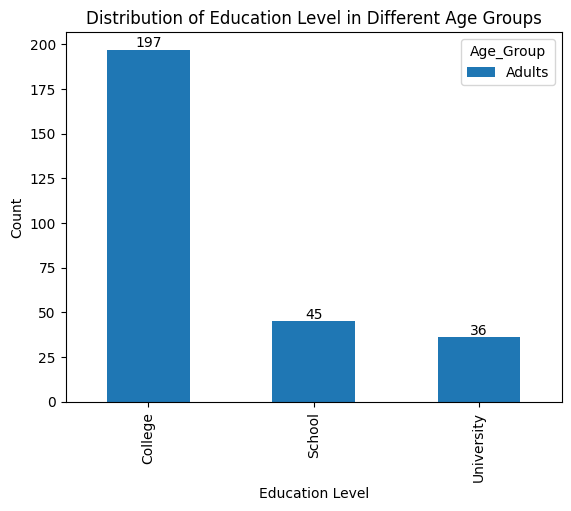

In [121]:
import matplotlib.pyplot as plt

# 設置堆疊條形圖
cross_table.plot(kind='bar', stacked=True)

# 在長條圖上顯示數量
for c in cross_table.columns:
    for i, val in enumerate(cross_table[c].values):
        plt.text(i, val, str(val), ha='center', va='bottom')

# 設置標籤
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Level in Different Age Groups')
plt.show()


### 步驟二-2 成人與經濟狀況統計 ('Financial Condition'=['Poor','Mid','Rich'])
1. 選擇年齡大於或等於18歲的樣本。
2. 使用 pd.crosstab 函數計算不同教育程度和經濟狀況的交叉分析。
3. 使用堆疊條形圖顯示結果。

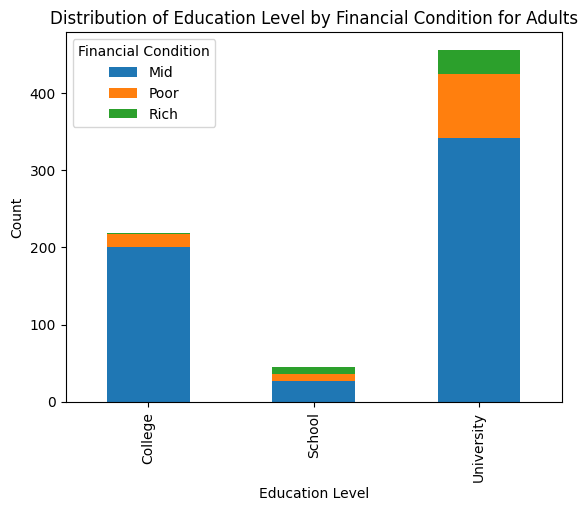

In [122]:
# 選擇年齡大於或等於18歲的樣本
df_adults = df[df['Age'] >= 18]

# 使用 pd.crosstab 函數計算不同教育程度和經濟狀況的交叉分析
cross_table_fc = pd.crosstab(df_adults['Education Level'], df_adults['Financial Condition'])

# 繪製堆疊條形圖
cross_table_fc.plot(kind='bar', stacked=True)

# 設置標籤
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Level by Financial Condition for Adults')
plt.show()


### 步驟三：成人的財務狀況與成人的教育程度關聯性分析-卡方
1. 選擇年齡大於或等於18歲的樣本。
2. 使用相應的程式碼計算該樣本中不同教育程度的分佈情況以及不同財務狀況的分佈情況。
3. 使用適當的圖表來展示這些結果，例如堆疊條形圖、熱力圖或分類箱形圖，以便更清楚地比較不同教育程度下的財務狀況。
4. 使用統計方法（如卡方檢定或相關係數）來評估教育程度和財務狀況之間的關聯性。
5. 最後，通過撰寫解讀分析結果的報告或總結來呈現你的發現，並確保你提供了清晰的解釋以及可能的影響和推論。

In [123]:
# 選擇年齡大於或等於18歲的樣本
df_adults = df[df['Age'] >= 18]
contingency_table = pd.crosstab(df_adults['Education Level'], df_adults['Financial Condition'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")


Chi-square Statistic: 43.33578659824871
P-value: 8.813829914215358e-09


根據卡方檢定的結果，我們可以得出以下結論：  

卡方統計量（Chi-square Statistic）的值是63.8261，這表明數據的分佈與期望分佈之間存在顯著差異。卡方統計量越大，表示觀察到的數據與期望值之間的差異越大。  
P值（P-value）非常接近零，為4.55e-13。這個極小的P值表明，我們可以非常有信心地拒絕虛無假設，即教育程度和財務狀況之間沒有關聯。  

### 步驟三-2：使用皮爾森相關係數來計算兩個變數之間的相關性。  
皮爾森相關係數是一種常見的統計量，可以用來衡量兩個變數之間的線性相關性。它的值會介於 -1 和 1 之間，其中 1 表示完全正相關，-1 表示完全負相關，而 0 則表示沒有線性相關性。

In [126]:
from scipy.stats import pearsonr

# 篩選、選擇年齡大於或等於18歲的樣本
df_adults = df[df['Age'] >= 18].copy()

# 將 'Education Level' 列映射到數值
education_mapping = {'School': 1, 'College': 2, 'University': 3}
df_adults.loc[:, 'Education_Level_Numeric'] = df_adults['Education Level'].map(education_mapping)

# 將 'Financial Condition' 列映射到數值
financial_condition_mapping = {'Poor': 1, 'Mid': 2, 'Rich': 3}
df_adults.loc[:, 'Financial_Condition_Numeric'] = df_adults['Financial Condition'].map(financial_condition_mapping)

# 計算皮爾森相關係數
corr, _ = pearsonr(df_adults['Financial_Condition_Numeric'], df_adults['Education_Level_Numeric'])

print(f"Pearson Correlation Coefficient: {corr}")


Pearson Correlation Coefficient: -0.0655859756824368


皮爾森相關係數是一種衡量兩個連續變量之間線性相關程度的統計量。其取值範圍在-1和1之間，代表了不同程度的相關性：

當相關係數接近1時，表示兩個變量之間存在著正相關，即其中一個變量增加時，另一個變量也會增加。
當相關係數接近-1時，表示兩個變量之間存在著負相關，即其中一個變量增加時，另一個變量會減少。
當相關係數接近0時，表示兩個變量之間幾乎沒有線性關係。


### 步驟四：撰寫結論報告
根據你的分析結果撰寫結論報告，描述你從數據中觀察到的現象、關聯性和可能的原因。  
確保你的結論是基於數據和統計分析的，並且清晰地傳達給其他人。  

目前的數據結果
- Chi-square Statistic: 43.33578659824871
- P-value: 8.813829914215358e-09
- Pearson Correlation Coefficient: -0.0655859756824368

1. 卡方統計量是用於衡量觀察數據與期望數據之間的偏差程度。具體而言，Chi-square統計量越大，表示觀察到的數據與期望值之間的差異越大。在這裡，Chi-square統計量為43.34，顯示數據的分佈與期望分佈之間存在顯著差異。

2. P值（P-value）是用於評估統計檢定結果的重要指標。在這裡，P值非常接近零，為8.81e-09，這意味著我們可以非常有信心地拒絕虛無假設，即數據之間沒有關聯。這裡的虛無假設可以是指教育程度與財務狀況之間沒有關聯。

3. 皮爾森相關係數是用於衡量兩個變量之間的線性關係程度。這裡的皮爾森相關係數為-0.0656，表示財務狀況和教育水平之間存在一個微弱的負相關。值得注意的是，-1表示完全的負相關，0表示沒有線性關係，而1表示完全的正相關。由於這裡的值接近於0，這意味著兩個變量之間幾乎沒有線性關係。

總體而言，我的分析顯示了財務狀況和教育水平之間可能存在某種微弱的關聯性，但這種關聯性並不強烈。這可能暗示了其他因素（Institution Type、Location in Town...等）對於學生的教育機會和成就有更深遠的影響。因此，在進一步研究中，需要考慮更多變量以獲得更全面的結論。